<h1>Partial Sessionn Classifiers</h3>

<h2>Load Data</h2>

In [1]:
import pandas as pd

# Load data
file_path = './datasets/merged_data_march_9_2024.csv'
merged_data_from_file = df = pd.read_csv(file_path, low_memory=False)

merged_data_from_file.head()

,Unnamed: 0.1,Unnamed: 0,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,...,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade,Grade Group
0,0,1,36109.900,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
1,1,3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
2,2,5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
3,3,7,36333.000,0.126290,0.188413,0.023834,0.126583,0.024996,0.126124,0.055529,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
4,4,9,36371.192,0.126344,0.188792,0.023866,0.126641,0.024909,0.126202,0.055519,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55


In [3]:
import pandas as pd
import numpy as np

# Sample sizes for which you want to calculate means
sample_sizes = [2000, 5000, 10000, 15000, 20000, 30000]

columns_to_average = ['Anger', 'Contempt',
       'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement',
       'Sentimentality', 'Confusion',
       'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Grade'] 

# List to hold the resulting DataFrames
mean_dfs = []

for size in sample_sizes:
    # Temporary list to hold the mean data for each respondent for the current size
    temp_mean_list = []
    
    # Iterate over each group of respondents
    for name, group in merged_data_from_file.groupby('Respondent'):
        # Ensure the group is sorted by timestamp
        sorted_group = group.sort_values(by='Timestamp')
        
        # Select the first 'size' samples
        selected_samples = sorted_group.head(size)
        
        # Calculate mean for the selected portion, for the specified columns
        mean_values = selected_samples[columns_to_average].mean().to_frame().T
        
        # Adding back the 'Respondent' information
        mean_values['Respondent'] = name
        
        # Append to the temporary list
        temp_mean_list.append(mean_values)
    
    # Concatenate all the mean values for the current sample size into a single DataFrame
    mean_df_for_current_size = pd.concat(temp_mean_list, ignore_index=True)
    
    # Save this DataFrame to a CSV file, including the size in the file name
    filename = f"mean_values_{size}_samples.csv"
    mean_df_for_current_size.to_csv(filename, index=False)

    print(f"Saved mean values for size {size} to '{filename}'")

Saved mean values for size 2000 to 'mean_values_2000_samples.csv'
Saved mean values for size 5000 to 'mean_values_5000_samples.csv'
Saved mean values for size 10000 to 'mean_values_10000_samples.csv'
Saved mean values for size 15000 to 'mean_values_15000_samples.csv'
Saved mean values for size 20000 to 'mean_values_20000_samples.csv'
Saved mean values for size 30000 to 'mean_values_30000_samples.csv'


<h2>Mean Values per Respondent</h2>

In [4]:
import pandas as pd

# Load data
file_path = './datasets/mean_values_2000_samples.csv'
mean_data_from_file = df = pd.read_csv(file_path, low_memory=False)

mean_data_from_file.head()

,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion,...,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,BlinkRate,Grade,Respondent
0,0.710070,1.785497,0.050067,0.801911,0.025690,0.133685,0.263752,4.033172,0.306048,0.036882,...,0.033363,5.228937,0.179143,0.306526,1.876968,0.065963,0.015512,26.650329,100.0,1
1,0.245223,2.908845,0.108897,0.198682,0.025865,0.177514,0.117156,10.314900,0.391502,0.037018,...,0.082130,7.715528,0.051533,0.170805,3.479006,0.030286,0.005000,15.275581,50.0,2
2,0.229979,0.184890,0.059788,0.227005,0.029915,0.126862,0.258945,4.890587,0.866634,0.025686,...,0.013204,7.252622,0.012614,1.087495,0.513524,0.017581,0.001500,3.175029,55.0,3
3,0.601508,5.323155,0.246041,0.380634,2.962681,0.257029,0.073903,27.372541,2.978463,0.256649,...,2.483309,30.142902,0.415011,3.479987,8.014784,0.336615,0.012000,19.311688,75.0,4
4,0.218407,4.898995,0.071701,0.157760,0.112062,3.000751,0.056079,9.891246,2.378599,1.363812,...,0.494968,2.487152,0.547941,2.882133,13.444009,1.056541,0.007500,13.623529,65.0,5


In [5]:
# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
mean_data_from_file['Grade Group'] = mean_data_from_file['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')


<h3>Classifiers</h3>

<h4>Logistic Regression</h4>

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np


# Separating features and target variable
X = mean_data_from_file[[ 'Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']]  
y = mean_data_from_file['Grade Group'] 

# Splitting the dataset into the Training set and Hold-out Validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42) 

# Creating a logistic regression model pipeline with standard scaling
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Applying cross-validation on the Training set
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores)}')

# Training the model on the entire Training set
model.fit(X_train, y_train)

# Predicting the Hold-out Validation set results
y_pred = model.predict(X_validation)

# Calculating the accuracy on the Hold-out Validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f'Hold-out validation accuracy: {accuracy}')


Cross-validation scores: [0.33333333 0.33333333 0.         0.5        0.        ]
Mean cross-validation score: 0.2333333333333333
Hold-out validation accuracy: 0.5


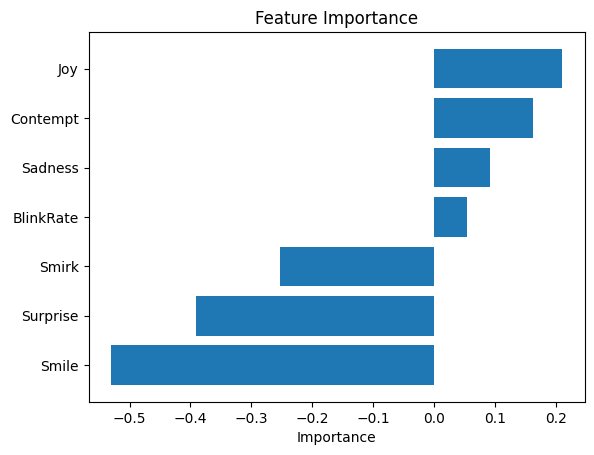

In [7]:
import matplotlib.pyplot as plt

model.fit(X_train, y_train)  

# Access the logistic regression instance from the pipeline (assuming it's the last step)
logreg = model.named_steps['logisticregression']

# Get feature names
feature_names = X.columns

# Get and display feature importances
importance = logreg.coef_[0]

# Sort features by importance
sorted_idx = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.show()


In [5]:
from joblib import dump

# Save the model to file
dump(model, 'LogisticRegression_full_session_classifier.joblib')

['LogisticRegression_full_session_classifier.joblib']

<h3>Random Forest for Grade Group</h3>

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']  # Assuming 'Grade Group' is your target variable for classification

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier directly
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the RandomForestClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6


In [7]:
print(rf_classifier.feature_names_in_)

['Contempt' 'Smirk' 'Surprise' 'Joy' 'Smile' 'Sadness' 'BlinkRate']


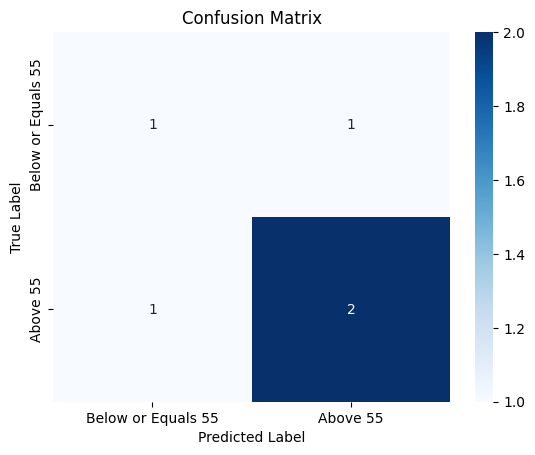

Classification Report:
               precision    recall  f1-score   support

    Above 55       0.50      0.50      0.50         2
    Below 55       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Below or Equals 55', 'Above 55']

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


In [9]:
from joblib import dump

# Save the model to file
dump(rf_classifier, 'rf_full_session_classifier.joblib')


['rf_full_session_classifier.joblib']

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
# To approximate a 70/30 split, you can use about 3 folds (since 1/3 is approximately 0.33, close to 30%)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
# Note: You might want to use scoring='accuracy' or another relevant metric based on your problem
scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.33333333 1.         0.5        0.5        0.         0.5
 0.5       ]
Mean cross-validation accuracy: 0.47619047619047616


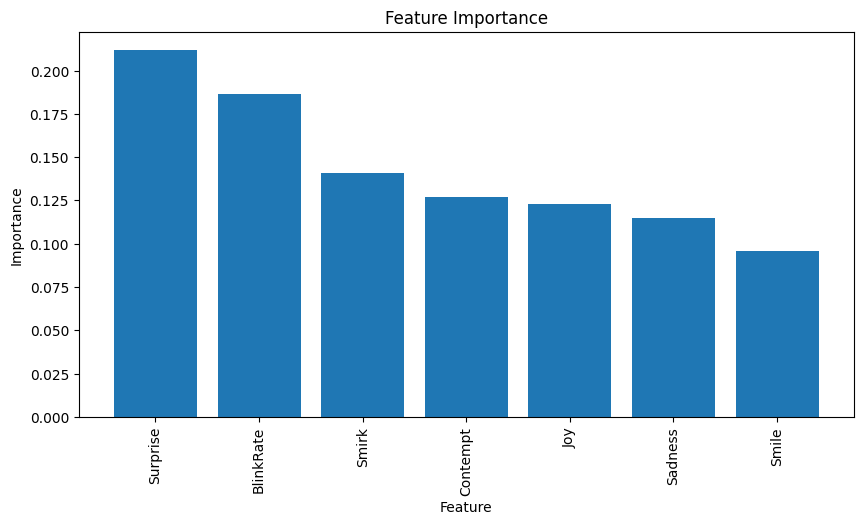

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the RandomForestClassifier
importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features_list[i] for i in indices]

# Create the plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [16]:
import shap

# Initialize the SHAP explainer with your model and fit it to your data
explainer = shap.Explainer(rf_classifier, X)

# Generate SHAP values for your data
shap_values = explainer(X)

# Assuming a single output model, directly use shap.force_plot with the correct parameters
# shap.force_plot(explainer.expected_value, shap_values.values[0:5,:],X.iloc[0:5,:], plot_cmap="DrDb")

shap.plots.waterfall(shap_values[0])

AttributeError: 'Tree' object has no attribute 'base_values'

<h3>Decision Tree Classifier</h3>

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Initialize the model directly with DecisionTreeClassifier, without StandardScaler
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6


In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
# To approximate a 70/30 split, you can use about 3 folds (since 1/3 is approximately 0.33, close to 30%)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
# Note: You might want to use scoring='accuracy' or another relevant metric based on your problem
scores = cross_val_score(dt_classifier, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.33333333 0.66666667 1.         0.5        0.         1.
 0.        ]
Mean cross-validation accuracy: 0.5


In [13]:
from sklearn.tree import export_text

tree_rules = export_text(dt_classifier, feature_names=['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate'])
print(tree_rules)

|--- Surprise <= 0.10
|   |--- class: Above 55
|--- Surprise >  0.10
|   |--- BlinkRate <= 23.27
|   |   |--- Smirk <= 0.41
|   |   |   |--- class: Above 55
|   |   |--- Smirk >  0.41
|   |   |   |--- class: Below 55
|   |--- BlinkRate >  23.27
|   |   |--- class: Above 55



In [ ]:
from joblib import dump

# Save the model to file
dump(dt_classifier, 'dt_classifier.joblib')


['dt_classifier.joblib']

<h3>Naive Bayes</h3>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = [ 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fitting the model on the training data
gnb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2


In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
scores = cross_val_score(gnb, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.66666667 0.33333333 0.5        0.5        0.5        0.
 0.        ]
Mean cross-validation accuracy: 0.35714285714285715


In [ ]:
# After fitting a GaussianNB model `gnb`:
print("Mean of features per class:", gnb.theta_)


Mean of features per class: [[ 3.61920871  2.09240636  1.73068044  3.08149425  0.7371144  14.15807348]
 [ 4.15193851  1.29378842  1.96593892  3.0377605   1.027397   10.30487074]]


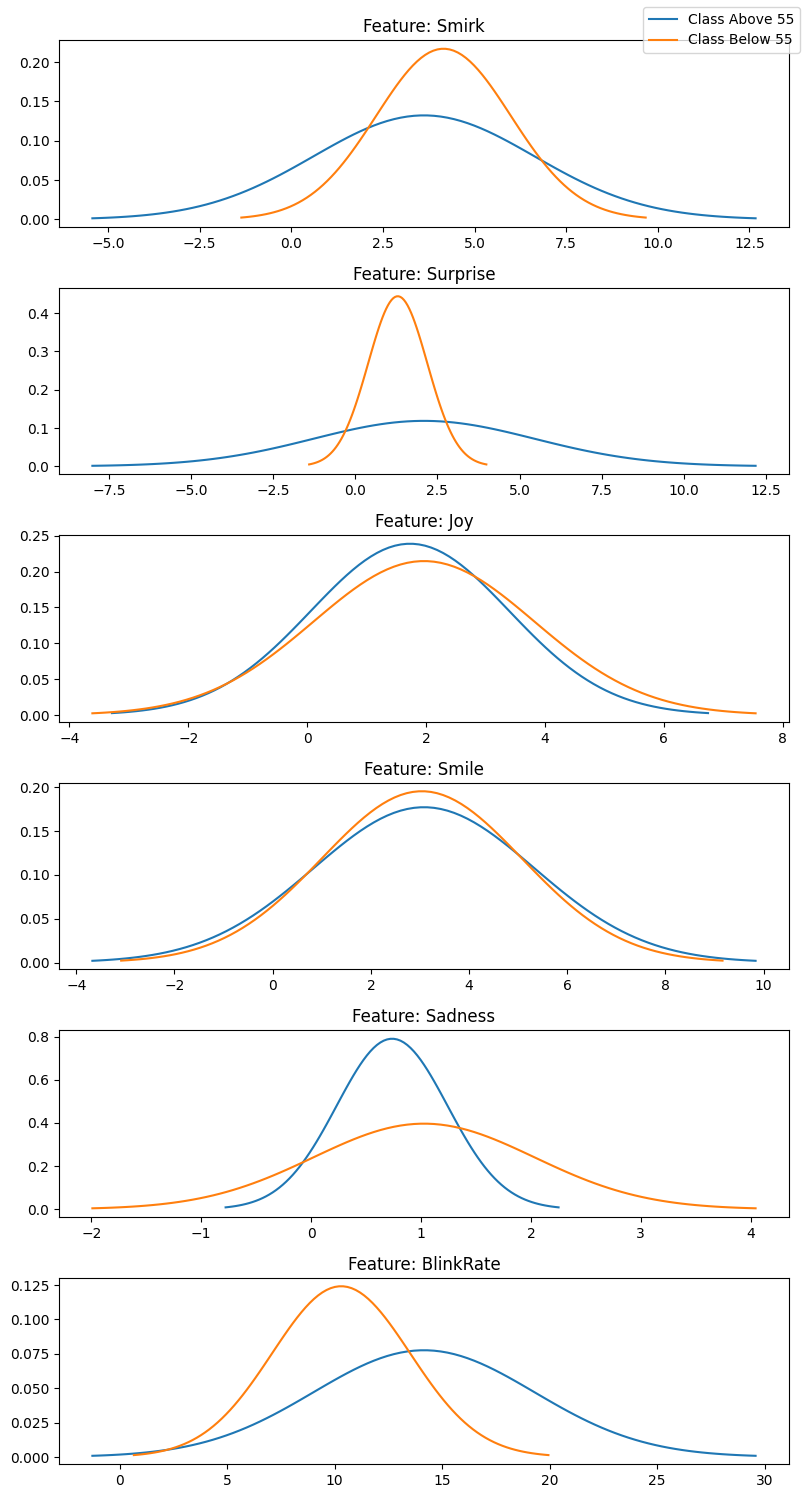

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_nb_distributions(model, X_train, feature_names):
    """
    Visualizes the Gaussian distributions of features for each class in a GaussianNB model.
    
    Parameters:
    - model: Trained GaussianNB model.
    - X_train: Training dataset features (pandas DataFrame).
    - feature_names: List of feature names (column names in X_train).
    """
    n_features = X_train.shape[1]
    n_classes = len(model.classes_)
    
    # Adjust for the number of features (use a larger figure size for readability if necessary)
    fig, axs = plt.subplots(n_features, 1, figsize=(8, n_features * 2.5), squeeze=False)
    
    for feature_idx in range(n_features):
        for class_idx in range(n_classes):
            # Mean and variance for the current feature in the current class
            mean = model.theta_[class_idx, feature_idx]
            variance = model.var_[class_idx, feature_idx]
            # Creating a range of values for probability density function
            x = np.linspace(mean - 3*np.sqrt(variance), mean + 3*np.sqrt(variance), 100)
            # Plotting the distribution
            axs[feature_idx, 0].plot(x, norm.pdf(x, mean, np.sqrt(variance)), label=f'Class {model.classes_[class_idx]}')
            axs[feature_idx, 0].set_title(f'Feature: {feature_names[feature_idx]}')
    
    # Add a legend outside the last subplot
    fig.legend(labels=[f'Class {cls}' for cls in model.classes_], loc='upper right')
    plt.tight_layout()
    plt.show()


feature_names = X_train.columns.tolist()  
plot_gaussian_nb_distributions(gnb, X_train, feature_names)


In [ ]:
from joblib import dump

# Save the model to file
dump(gnb, 'NB_model.joblib')


['NB_model_2.joblib']

<h4>With standardScaler and pipeline</h4>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = [ 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = [ 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline with StandardScaler and GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('naive_bayes', GaussianNB())
])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.33333333 0.33333333 0.5        1.         0.5        1.
 0.5       ]
Mean cross-validation accuracy: 0.5952380952380951


<h3>Support Vector Classifier</h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of columns to use as features
features_list = [ 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

# Selecting the features and target from the DataFrame
X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline with StandardScaler and SVC
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale data
    ('svc', SVC(random_state=42, probability=True))  # SVM classifier
])

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
scores = cross_val_score(svm_pipeline, X, y, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.33333333 0.33333333 0.5        1.         0.5        0.5
 0.5       ]
Mean cross-validation accuracy: 0.5238095238095238


<h3>XGBoost</h3>

In [16]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming mean_data_from_file is your DataFrame, and it's already defined
features_list = ['Contempt', 'Surprise', 'Joy', 'Sadness']

X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']  # Target variable for classification

# Encoding string labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# To find out which category is encoded as 0 (or any other number)
encoded_labels = list(label_encoder.classes_)
for index, label in enumerate(encoded_labels):
    print(f"The category '{label}' is encoded as {index}.")

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize XGBClassifier without use_label_encoder
xgb_classifier = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Fit the XGBClassifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the XGBClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


The category 'Above 55' is encoded as 0.
The category 'Below 55' is encoded as 1.
Accuracy: 0.4


In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
scores = cross_val_score(xgb_classifier, X, y_encoded, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

Accuracy scores for each fold: [0.33333333 0.66666667 0.5        0.         0.5        1.
 0.        ]
Mean cross-validation accuracy: 0.42857142857142855


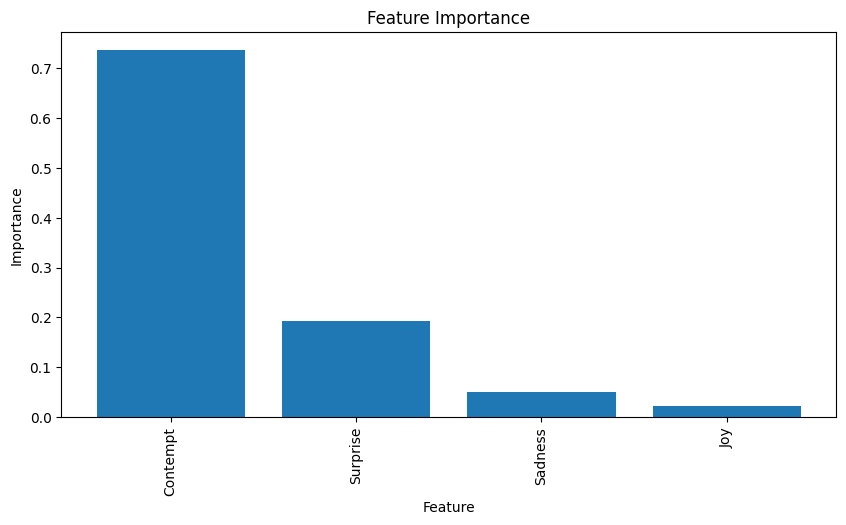

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the RandomForestClassifier
importances = xgb_classifier.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features_list[i] for i in indices]

# Create the plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


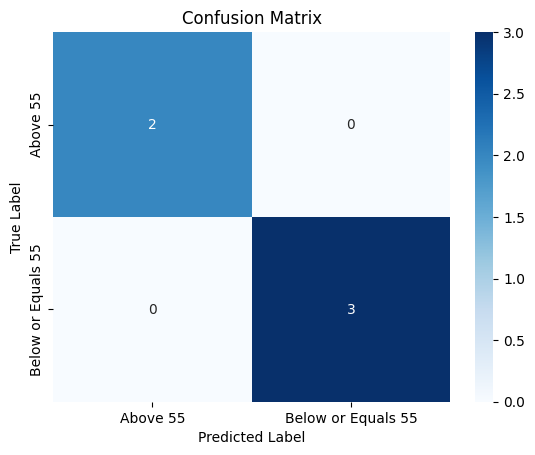

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Above 55', 'Below or Equals 55']

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


In [51]:
from joblib import dump

# Save the model to file
dump(xgb_classifier, 'xgboost_classifier_2.joblib')


['xgboost_classifier_2.joblib']

<h3>LightGBM</h3>

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming mean_data_from_file is your DataFrame, and it's already defined
features_list = ['Contempt', 'Smirk', 'Surprise', 'Joy', 'Smile', 'Sadness', 'BlinkRate']

X = mean_data_from_file[features_list]
y = mean_data_from_file['Grade Group']  # Target variable for classification

# Encoding string labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize LGBMClassifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Fit the LGBMClassifier on the training data
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the LGBMClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 5, number of negative: 6
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 11, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.454545 -> initscore=-0.182322
[LightGBM] [Info] Start training from score -0.182322
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
scores = cross_val_score(lgbm_classifier, X, y_encoded, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 7, number of negative: 6
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 13, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there

In [55]:
from joblib import dump

# Save the model to file
dump(lgbm_classifier, 'lightgbm_classifier.joblib')


['lightgbm_classifier.joblib']